In [169]:
import os
from os.path import expanduser   #home dir
dbase='test'  ## TEST dbase feat
table='db'
home = expanduser("~")
with open(home+'/.'+table+'.mysql', 'r') as content:
    allf = content.read().split('\n')
config = {
  'user': allf[1],  'password': allf[2],  'host': allf[0],
  'database': dbase,  'raise_on_warnings': True,
}
print('I have data to access mysql /',table,'/ on',allf[0])

I have data to access mysql / db / on localhost


In [176]:
import mysql.connector
import datetime
from datetime import date

days=7
week = datetime.datetime.now() - datetime.timedelta(hours=24*days)
weekp1 = datetime.datetime.now() - datetime.timedelta(hours=24*days+24)

cnx = mysql.connector.connect(**config)
#query =("SELECT * FROM "+table+" WHERE t > '"+str(week)+"' ORDER BY t DESC")
query="SELECT * FROM "+table+" WHERE t > '"+str(week)+"' ORDER BY t DESC"
print(query)
import pandas as pd
df = pd.read_sql( query , con=cnx)
print('loaded dataframe from MySQL. records:', len(df))
cnx.close()

SELECT * FROM db WHERE t > '2016-12-22 13:24:31.528599' ORDER BY t DESC
loaded dataframe from MySQL. records: 2414


In [177]:
table2='forecast'
with open(home+'/.'+table2+'.mysql', 'r') as content:
    allf = content.read().split('\n')
config = {
  'user': allf[1],  'password': allf[2],  'host': allf[0],
  'database': dbase,  'raise_on_warnings': True,
}
cnx2 = mysql.connector.connect(**config)
query="SELECT * FROM "+table2+" WHERE t > '"+str(weekp1)+"'  ORDER BY t DESC"
print('I have data to access mysql /',table2,'/ on',allf[0],'\n',query)
dff = pd.read_sql( query , con=cnx2)
cnx2.close()
dff

I have data to access mysql / forecast / on localhost 
 SELECT * FROM forecast WHERE t > '2016-12-21 13:24:31.528705'  ORDER BY t DESC


,t,a,b,c
0,2016-12-29 05:31:19,1.0,-5.0,0.0
1,2016-12-28 05:31:24,5.0,-4.0,1.0
2,2016-12-27 05:31:35,5.0,3.0,5.0
3,2016-12-26 05:31:26,9.0,1.0,5.0
4,2016-12-25 05:31:30,7.0,5.0,10.0
5,2016-12-24 05:31:27,5.0,3.0,7.0
6,2016-12-23 05:31:19,2.0,-1.0,5.0
7,2016-12-22 05:31:21,-2.0,-4.0,1.0


0 x1,x2 736327.2300810185 736328.2200810185
1 x1,x2 736326.2301388889 736327.2201388889
2 x1,x2 736325.2302662038 736326.2202662037
3 x1,x2 736324.2301620371 736325.2201620371
4 x1,x2 736323.2302083333 736324.2202083333
5 x1,x2 736322.2301736111 736323.2201736111
6 x1,x2 736321.2300810185 736322.2200810185
7 x1,x2 736320.2301041667 736321.2201041667


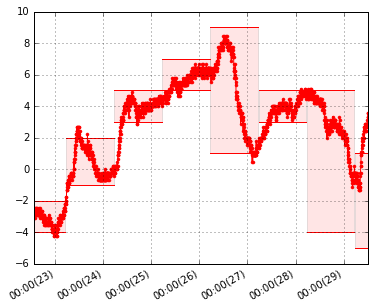

In [178]:
%matplotlib inline
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as dt


monthsFmt = DateFormatter("%H:%M(%d)")
fig, ax = plt.subplots( figsize=(6, 5), dpi=100 )
ax.xaxis.set_major_formatter(monthsFmt)#nice diagonal format
plt.plot( df.t, df.a ,'r.-')
xmin, xmax = plt.gca().get_xlim()

#dffrepl=dff.t[0].replace(hour=5, minute=30)  #not necessary
#x1=datetime.datetime.strptime(dffrepl.strftime("%Y-%m-%d %H:%M:%S"), '%Y-%m-%d %H:%M:%S' ).toordinal()+(3600*5)/24/3600

#print('x1=',x1)
#print('type   :', type(dff.t[0]) )
#timenum=dff.t[0].to_pydatetime()
#print('type   :', type(timenum) )
#timenum=dt.date2num( timenum )
#print('timenum:', timenum)
#x1=timenum
#timenum=matplotlib.dates.date2num(dff.t[0])
#timenum=datetime.datetime.fromtimestamp( dff.t[0] )# float is required


#x1=datetime.datetime.strptime( timenum, '%Y-%m-%d %H:%M:%S' )
#print(x1)
#x2=datetime.datetime.strptime(dffrepl.strftime("%Y-%m-%d %H:%M:%S"), '%Y-%m-%d %H:%M:%S' ).toordinal()+3600*23.9/24/3600
#print('x2',x2)
for i in range(0, len(dff.index) ):
#    x1= dt.date2num(  dff.t[i].to_pydatetime()  )  # problem from shell script
    x1= dt.date2num(  pd.to_datetime( dff.t[i] ))
    x2= x1 + 0.99
    print(i,'x1,x2',x1,x2)

    x1,x2=([x1,x2]-xmin)/(xmax-xmin)
    p = plt.axhspan( dff.b[i], dff.a[i], xmin=x1,xmax=x2, facecolor='r', alpha=0.1)
    #p = plt.axhspan( dff.b[0], dff.c[0], xmin=x1+1,xmax=x2, facecolor='r', alpha=0.1)
    plt.axhline(y=dff.a[i], xmin=x1,xmax=x2, linewidth=1, color='r')
    plt.axhline(y=dff.b[i], xmin=x1,xmax=x2, linewidth=1, color='r')


plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()